In scikit-learn, transformers are objects that preprocess data by applying transformations, typically using the fit and transform methods.

* Transformers are of different types:-

1. Column Transformer
2. Function Transformer
3. Power Transformer



#An important question
 Why is the performance of the model improved after performing transformation on it?

* These transformations help make data more normal (Gaussian-like) and reduce skewness in machine learning models.

Therefore, the end goal of using all these transformation techniques is to make the data Bell curved or normally distributed. But why is it needed?

* We always need a Normal distribution because
1. Many Machine Learning Models Assume Normality and perform better with it
2. Helps in Feature Scaling & Gradient Descent
3. Reduces Skewness & Stabilizes Variance
4. Improves Interpretability & Performance

#1. Column Transformer

* Its difficult to handle all types of data (numerical, categorical, missing values, etc) we have to perform different techniques and transformations for all.

* Different numpy arrays will be created for each transformation, then to join them all, this will create a HUGE HASSLE.

* To avoid this, we have Column Transformer.

The ColumnTransformer in scikit-learn allows you to apply different transformations to different columns of a dataset in a single step. This is particularly useful when working with mixed data types (numerical and categorical).

#Without using a Column Transformer

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder #for one hot and ordinal encoding of Categorical data
from sklearn.impute import SimpleImputer #transformer in scikit-learn used to fill in missing values in a dataset using a specified strategy.
from sklearn.preprocessing import MinMaxScaler #normalization

from google.colab import files

import warnings
warnings.filterwarnings("ignore")


In [ ]:
files.upload()

Saving covid_toy.csv to covid_toy.csv


{'covid_toy.csv': b'age,gender,fever,cough,city,has_covid\r\n60,Male,103.0,Mild,Kolkata,No\r\n27,Male,100.0,Mild,Delhi,Yes\r\n42,Male,101.0,Mild,Delhi,No\r\n31,Female,98.0,Mild,Kolkata,No\r\n65,Female,101.0,Mild,Mumbai,No\r\n84,Female,,Mild,Bangalore,Yes\r\n14,Male,101.0,Strong,Bangalore,No\r\n20,Female,,Strong,Mumbai,Yes\r\n19,Female,100.0,Strong,Bangalore,No\r\n64,Female,101.0,Mild,Delhi,No\r\n75,Female,,Mild,Delhi,No\r\n65,Female,98.0,Mild,Mumbai,Yes\r\n25,Female,99.0,Strong,Kolkata,No\r\n64,Male,102.0,Mild,Bangalore,Yes\r\n51,Male,104.0,Mild,Bangalore,No\r\n70,Male,103.0,Strong,Kolkata,Yes\r\n69,Female,103.0,Mild,Kolkata,Yes\r\n40,Female,98.0,Strong,Delhi,No\r\n64,Female,98.0,Mild,Bangalore,Yes\r\n42,Female,,Strong,Bangalore,Yes\r\n12,Male,98.0,Strong,Bangalore,No\r\n73,Male,98.0,Mild,Bangalore,Yes\r\n71,Female,98.0,Strong,Kolkata,Yes\r\n80,Female,98.0,Mild,Delhi,Yes\r\n13,Female,100.0,Strong,Kolkata,No\r\n23,Male,,Mild,Mumbai,No\r\n19,Female,100.0,Mild,Kolkata,Yes\r\n33,Female,102

In [ ]:
df = pd.read_csv('covid_toy.csv')
display(df.head() , df.shape)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


(100, 6)

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
fever,10
cough,0
city,0
has_covid,0


Fever column has 10 Missing values

In [ ]:
display(df['cough'].value_counts() , df['city'].value_counts())

,count
cough,
Mild,62
Strong,38


,count
city,
Kolkata,32
Bangalore,30
Delhi,22
Mumbai,16


age, fever --> Numerical data --> scaling (opt)

fever --> Missing values --> simple imputer

gender , city --> Nominal Categorical data --> OHE

cough --> Ordinal categorical data --> ordinal encoder

output col --> label encoder

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=['has_covid']),
                                                       df['has_covid'],
                                                       test_size=0.2,
                                                       random_state=2)

In [ ]:
display(x_train)

,age,gender,fever,cough,city
35,82,Female,102.0,Strong,Bangalore
11,65,Female,98.0,Mild,Mumbai
84,69,Female,98.0,Strong,Mumbai
44,20,Male,102.0,Strong,Delhi
73,34,Male,98.0,Strong,Kolkata
...,...,...,...,...,...
43,22,Female,99.0,Mild,Bangalore
22,71,Female,98.0,Strong,Kolkata
72,83,Female,101.0,Mild,Kolkata
15,70,Male,103.0,Strong,Kolkata


In [ ]:
#fever --> simple imputer
si = SimpleImputer()
x_train_fever = si.fit_transform(x_train[['fever']])
x_test_fever = si.fit_transform(x_test[['fever']])


display(x_train_fever , x_train_fever.shape) #replaced by mean

array([[102.        ],
       [ 98.        ],
       [ 98.        ],
       [102.        ],
       [ 98.        ],
       [100.79166667],
       [100.79166667],
       [101.        ],
       [104.        ],
       [104.        ],
       [102.        ],
       [100.        ],
       [ 98.        ],
       [ 99.        ],
       [101.        ],
       [100.        ],
       [101.        ],
       [103.        ],
       [100.79166667],
       [100.79166667],
       [ 99.        ],
       [ 98.        ],
       [101.        ],
       [ 99.        ],
       [104.        ],
       [101.        ],
       [100.79166667],
       [100.        ],
       [102.        ],
       [101.        ],
       [101.        ],
       [101.        ],
       [ 98.        ],
       [104.        ],
       [ 99.        ],
       [100.79166667],
       [104.        ],
       [ 99.        ],
       [101.        ],
       [100.        ],
       [104.        ],
       [100.79166667],
       [ 99.        ],
       [ 98

(80, 1)

In [ ]:
#Ordinal encoding --> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
x_train_cough = oe.fit_transform(x_train[['cough']])
x_test_cough = oe.fit_transform(x_test[['cough']])

display(x_train_cough , x_train_cough.shape)

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],

(80, 1)

In [ ]:
#OHE --> gender ,city
ohe = OneHotEncoder(drop='first', sparse_output=False)
x_train_gender_city = ohe.fit_transform(x_train[['gender','city']])
x_test_gender_city = ohe.fit_transform(x_test[['gender','city']])

x_train_gender_city.shape #(we get 2 col from gender, 4 cols from city, after drop first, total 4 cols)

(80, 4)

In [ ]:
#removing age col from the dataset

x_train_age = x_train.drop(columns=['gender','fever','cough','city']).values
x_test_age = x_test.drop(columns=['gender','fever','cough','city']).values

display(x_train_age , x_train_age.shape)

array([[82],
       [65],
       [69],
       [20],
       [34],
       [84],
       [23],
       [ 8],
       [34],
       [56],
       [69],
       [27],
       [64],
       [66],
       [38],
       [11],
       [14],
       [46],
       [38],
       [75],
       [25],
       [83],
       [47],
       [60],
       [12],
       [34],
       [42],
       [19],
       [24],
       [81],
       [64],
       [51],
       [40],
       [ 6],
       [49],
       [82],
       [42],
       [72],
       [20],
       [19],
       [75],
       [79],
       [59],
       [ 5],
       [25],
       [14],
       [19],
       [47],
       [51],
       [ 5],
       [68],
       [19],
       [54],
       [73],
       [65],
       [23],
       [26],
       [49],
       [11],
       [27],
       [65],
       [65],
       [50],
       [55],
       [12],
       [83],
       [10],
       [18],
       [16],
       [27],
       [44],
       [74],
       [20],
       [ 5],
       [24],
       [22],
       [71],

(80, 1)

In [ ]:
#now we have all columns separately and we can join them to complete the dataset

x_train_transformed = np.concatenate((x_train_gender_city , x_train_cough , x_train_fever , x_train_age),axis=1)
x_test_transformed = np.concatenate((x_test_gender_city , x_test_cough , x_test_fever , x_test_age),axis=1)

display(x_train_transformed , x_train_transformed.shape)

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          1.        , 102.        ,  82.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ,
          0.        ,  98.        ,  65.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,  98.        ,  69.        ],
       [  1.        ,   1.        ,   0.        ,   0.        ,
          1.        , 102.        ,  20.        ],
       [  1.        ,   0.        ,   1.        ,   0.        ,
          1.        ,  98.        ,  34.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 100.79166667,  84.        ],
       [  1.        ,   0.        ,   0.        ,   1.        ,
          0.        , 100.79166667,  23.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ,
          0.        , 101.        ,   8.        ],
       [  0.        ,   1.        ,   0.        ,   0.        ,
          1.    

(80, 7)

4+1+1+1 = 7 cols

#Using Column Transformer




In [ ]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['gender','city'])
],remainder='passthrough')

* always pass the transformers in a tuple , no of transformer = no of tuples
* remainder = cols that do not have any transformation , eg, age
* remainder = drop to remove the untouched col

In [ ]:
transformer.fit_transform(x_train)
transformer.fit_transform(x_test)

display(transformer.fit_transform(x_train).shape)

(80, 7)

# 2. Function Transformer

Most frequently used.

We can perform these using FT:-
1. Log Transform
2. Reciprocal Transform
3. Sq or Sqrt Transform
4. Custom Transform

we can find the distribution of our data using
1. sns.distplot,
2. pd.skew or
3. QQPlot

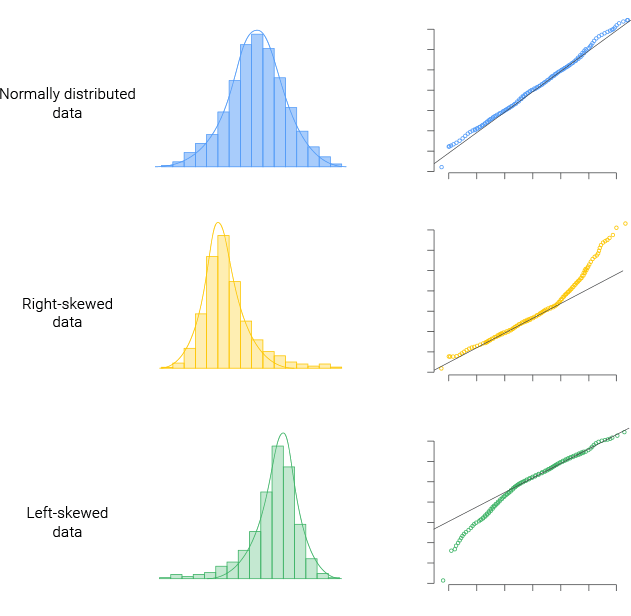


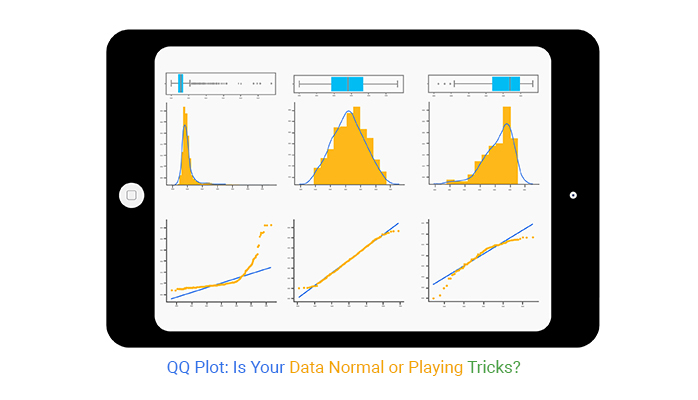

1. Log Transform log(x) -- Cannot use on negative values (because we can't their log)

Can be used on a right skewed data, it will bring it back to center.

It improves the performance of Linear models because it brings the scale to equidistant values

eg. (1,10,100,1000,10000...)
after log, they all will be **equidistant** or linearly distributed.

Converts your additive scale to a Multiplicative scale.

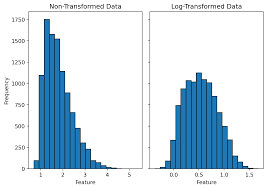

2. Reciprocal Transform (1/x)

small values -->  becomes larger

larger values --> becomes smaller

3. Square Transform (x^2)

specially used for Left skewed data

4. SquareRoot Transform (sqrt(x))

Reduces right skewness, but less aggressively than log or reciprocal and

rarely used.

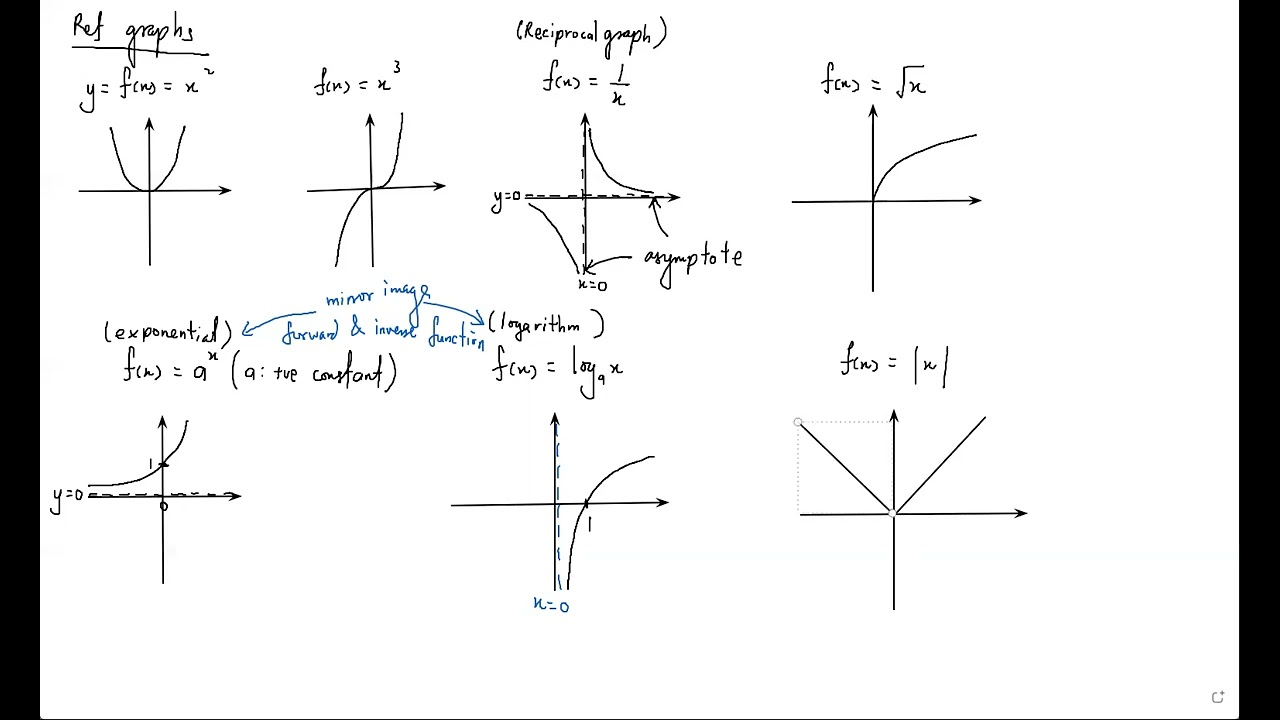

In [ ]:
import scipy.stats as stats

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
files.upload()

Saving SVMtrain.csv to SVMtrain.csv


{'SVMtrain.csv': b'PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked\r\n1,0,3,Male,22,1,0,7.25,3\r\n2,1,1,female,38,1,0,71.2833,1\r\n3,1,3,female,26,0,0,7.925,3\r\n4,1,1,female,35,1,0,53.1,3\r\n5,0,3,Male,35,0,0,8.05,3\r\n6,0,3,Male,60,0,0,8.4583,2\r\n7,0,1,Male,54,0,0,51.8625,3\r\n8,0,3,Male,2,3,1,21.075,3\r\n9,1,3,female,27,0,2,11.1333,3\r\n10,1,2,female,14,1,0,30.0708,1\r\n11,1,3,female,4,1,1,16.7,3\r\n12,1,1,female,58,0,0,26.55,3\r\n13,0,3,Male,20,0,0,8.05,3\r\n14,0,3,Male,39,1,5,31.275,3\r\n15,0,3,female,14,0,0,7.8542,3\r\n16,1,2,female,55,0,0,16,3\r\n17,0,3,Male,2,4,1,29.125,2\r\n18,1,2,Male,60,0,0,13,3\r\n19,0,3,female,31,1,0,18,3\r\n20,1,3,female,60,0,0,7.225,1\r\n21,0,2,Male,35,0,0,26,3\r\n22,1,2,Male,34,0,0,13,3\r\n23,1,3,female,15,0,0,8.0292,2\r\n24,1,1,Male,28,0,0,35.5,3\r\n25,0,3,female,8,3,1,21.075,3\r\n26,1,3,female,38,1,5,31.3875,3\r\n27,0,3,Male,60,0,0,7.225,1\r\n28,0,1,Male,19,3,2,263,3\r\n29,1,3,female,60,0,0,7.8792,2\r\n30,0,3,Male,60,0,0,7.8958,3\r\n31,

In [ ]:
data = pd.read_csv('SVMtrain.csv', usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
x1 = data.iloc[:,1:3]
y1 = data.iloc[:,0]

In [ ]:
y1

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
884,0
885,1
886,0
887,1


In [ ]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x1,y1, test_size=0.2, random_state=42)
display(x1.shape, x_train1.shape , x_test1.shape)

(889, 2)

(711, 2)

(178, 2)

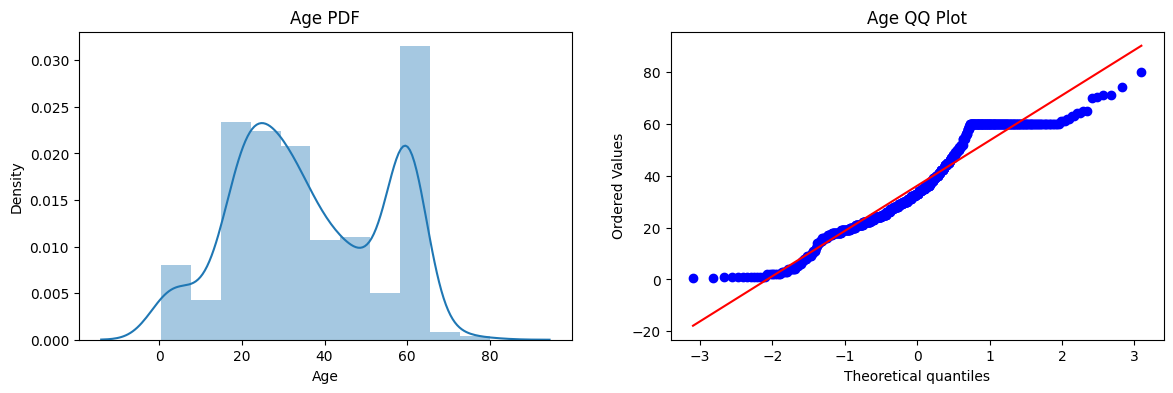

In [76]:
plt.figure(figsize=(14,4))
plt.subplot(121) # (1 -- no of cols,2 -- no of subplots,1 -- index)
sns.distplot(x_train1['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train1['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

The data is close to normally distributed but deviated sometimes

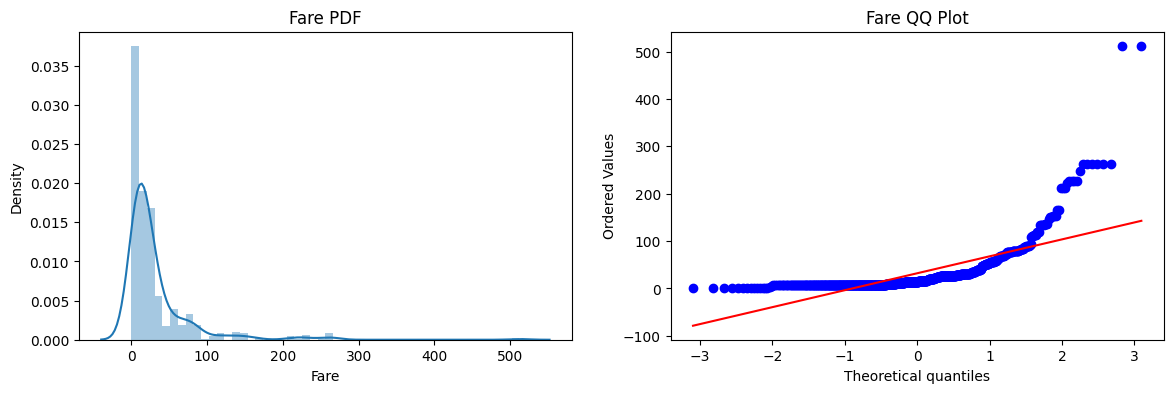

In [90]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train1['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train1['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

The data is right skewed, not normally distributed, rich people had spent too much money.

We can do Log Transform on it.

In [78]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [80]:
clf.fit(x_train1,y_train1)
clf2.fit(x_train1,y_train1)

y_pred = clf.predict(x_test1)
y_pred1 = clf2.predict(x_test1)

print("Accuracy LR",accuracy_score(y_test1,y_pred))
print("Accuracy DT",accuracy_score(y_test1,y_pred1))

Accuracy LR 0.6910112359550562
Accuracy DT 0.6573033707865169


 Logistic Regression (LogisticRegression) does not have a transform() method.

applying Function transform to both

In [81]:
trf = FunctionTransformer(func = np.log1p)

np.log is simple logrithm

but

np.log1p adds 1 first that will never let the value become zero

In [83]:
X_train_transformed = trf.fit_transform(x_train1)
X_test_transformed = trf.transform(x_test1)

In [84]:
#again
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train1)
clf2.fit(X_train_transformed,y_train1)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test1,y_pred))
print("Accuracy DT",accuracy_score(y_test1,y_pred1))

Accuracy LR 0.6966292134831461
Accuracy DT 0.6573033707865169


Improvement in LR

In [85]:
#cross validation

X_transformed = trf.fit_transform(x1)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y1,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y1,scoring='accuracy',cv=10)))

LR 0.6827885597548519
DT 0.6581077630234933


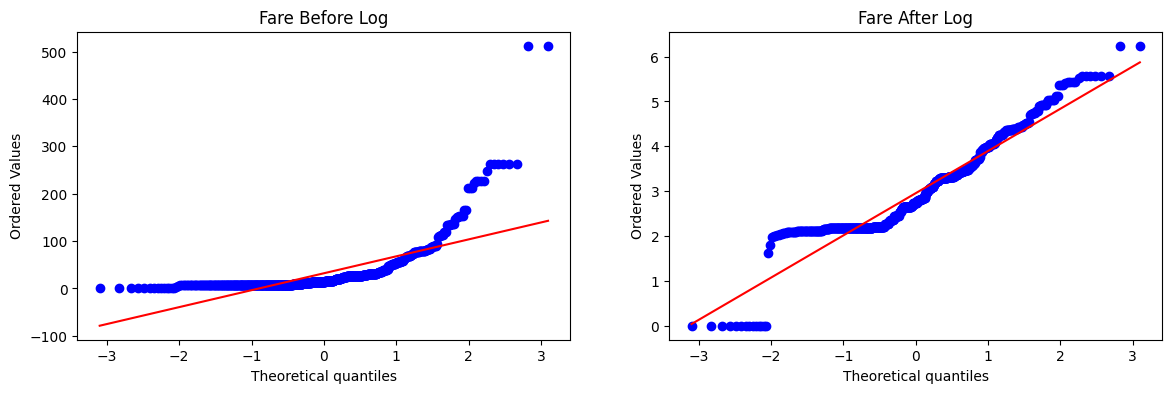

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train1['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()


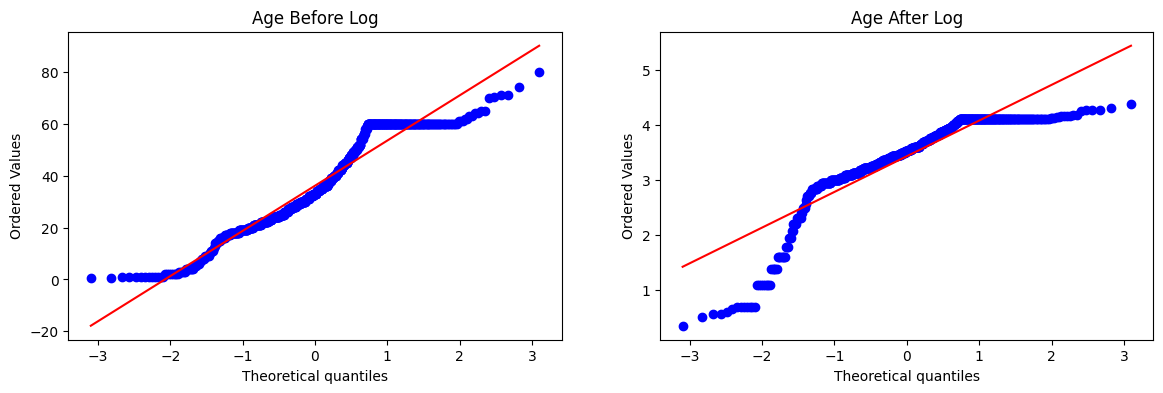

In [86]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train1['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

The performance did not improve, so we use column transformation on Fare only

This means that Age col was already Normal dist and Fare col was skewed which is changed now

In [87]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(x_train1)
X_test_transformed2 = trf2.transform(x_test1)


In [88]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train1)
clf2.fit(X_train_transformed2,y_train1)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test1,y_pred))
print("Accuracy DT",accuracy_score(y_test1,y_pred2))

Accuracy LR 0.6910112359550562
Accuracy DT 0.6629213483146067


In [ ]:
X_transformed2 = trf2.fit_transform(x1)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y1,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y1,scoring='accuracy',cv=10)))

LR 0.667032686414709
DT 0.6468590398365679


Thus, we see that Decision Tree is unaffected by the transformation and only Logistic Regression is affected.

In [ ]:
def apply_transform(transform):
    X = data.iloc[:,1:3]
    y = data.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y1,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6209014300306436


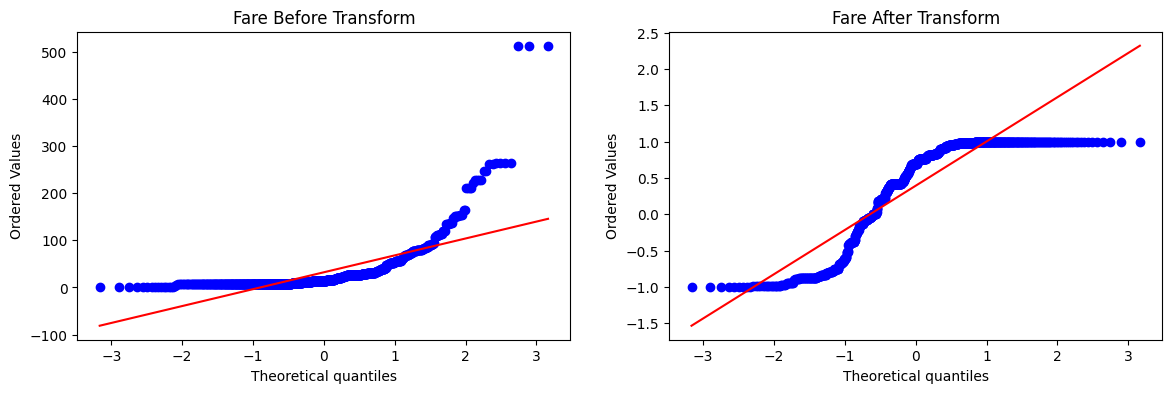

In [ ]:
apply_transform(np.sin)


Accuracy 0.6186670071501531


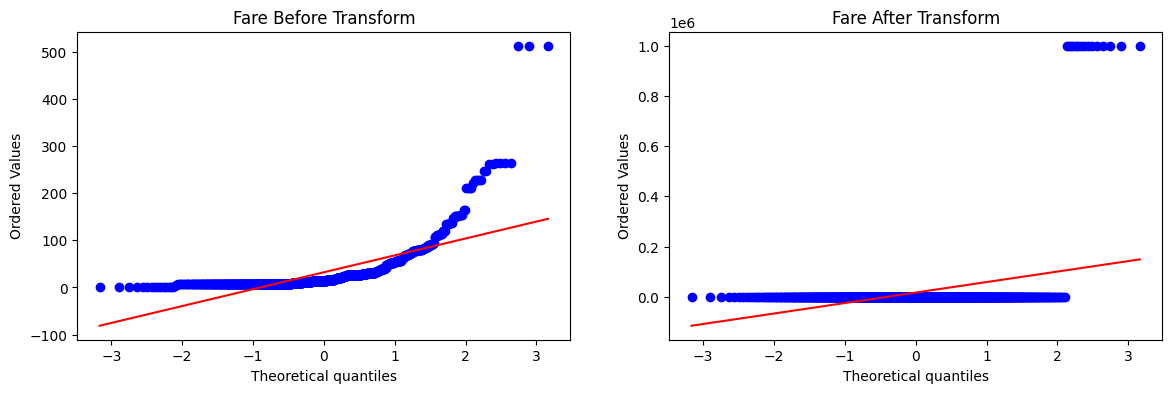

In [89]:
apply_transform(lambda x: 1/(x+0.000001))